<a href="https://colab.research.google.com/github/Haridasaravind/CS612/blob/main/CS612.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import random
from Bio import SeqIO

def read_fasta(directory='.'):
    # Obtain a list of all files with the .fas extension in the specified directory
    fas_files = [f for f in os.listdir(directory) if f.endswith('.fas')]
    # Select a random .fas file from the list
    selected_file = random.choice(fas_files)
    print(f"Selected File: {selected_file}")

    # Read the multiple sequence alignment (MSA) file
    records = SeqIO.parse(os.path.join(directory, selected_file), "fasta")

    # Dictionary to store sequences grouped by family
    sequences_by_family = {}

    # Process each sequence record
    for record in records:
        # Check if the record ID contains an underscore
        if '_' in record.id:
            # Extract family information from the record ID
            family = record.id.split("_")[1]

            # Add the sequence to the corresponding family in the dictionary
            if family in sequences_by_family:
                sequences_by_family[family].append(record.seq)
            else:
                sequences_by_family[family] = [record.seq]
        else:
            print(f"Warning: Skipping record with ID '{record.id}' because it does not contain an underscore")

    # Print summary statistics
    total_sequences = sum(len(sequences) for sequences in sequences_by_family.values())
    print(f"Total sequences: {total_sequences}")
    
    # Uncomment the following code to print the unique families
    # print(f"Total unique families: {len(sequences_by_family)}")
    # for family, sequences in sequences_by_family.items():
    #     print(f"Family {family}: {len(sequences)} sequences")

    # Uncomment the following code to print the sequences grouped by family
    # for family, sequences in sequences_by_family.items():
    #     print(f"\nFamily: {family}")
    #     for sequence in sequences:
    #         print(sequence)
    
    return sequences_by_family

sequences = read_fasta()

print(sequences)

Selected File: YAGP_YAHO_20_id90.fas
Total sequences: 143
{'I5NWS5': [Seq('----------KEHGIPETPQELSNHNCLRLRH-KSG-ALAWEFSKGNEEFEIEV...KKK')], 'K4W2G4': [Seq('----------AQHGAPKHLTDLSALPCLERD----HPFGVWQL-RNKEHHAIKV...K--')], 'B2VGV9': [Seq('----------VQFGTPEKPSDIGNHSWLEYSV---RPDNDFELSPEGAIR-LSP...K--')], 'H7ECT9': [Seq('----------AQYGTPEKPADLSSHSWLEYSV---RPDNEFELAPEGSTR-LIP...K--')], 'B7NKX0': [Seq('---------ISRYGKPETIDDLKQHICLGFTE--PASLNTWPI-SDGQ-LH-EV...K--')], 'L2D3M5': [Seq('----------QKYPQPQSLQELSRHDCLERD----MTHGIWEL-GNGQKKSVKV...K--')], 'G2SCY6': [Seq('----------AQYGVPEKPADLSNHSWLEYSV---RPDNEFELAPEGSTK-LLP...K--')], 'L5VU34': [Seq('----------AQYGVPEKPADLSSHSWLEYSV---RPDNEFELAPEGSTR-LIP...K--')], 'I0MWA2': [Seq('---------IARFGKPETVEELKRHLCLGFSE--PVSLNTWPI-SDGQ-LH-EI...A--')], 'E0SFY2': [Seq('---------------------LFDHSLINFRLPTSGTLIGWPLMSDGREIRVRG...K--')], 'E0SEL1': [Seq('---------FAARGTPASPEALEDHDAVIYLQ-TDAP-GNWLFCRDDRQCRVTM...N--')], 'K8C201': [Seq('---------LERH-PISTPGALGSADWLVHTR--

In [ ]:
import random

def read_sequence(sequences):
    # Flatten the list of sequences
    all_sequences = [seq for seq_list in sequences.values() for seq in seq_list]
    # Select a random sequence from the list
    return random.choice(all_sequences)


In [ ]:
seq = read_sequence(sequences)
print(seq)

---------LTRFGYPQSLDDLADHALIHYASNLGVRPLGFEVVSDGAVRWVKAGGVLTVNSTETYQASCLAGLGIIQVPRIGVREMLRTGELIEILPHYRAEPLPVSLIYPHRRNLSRRVHLFMEWLGGMM----MKFVTGIVASLVGLSFG-AFAAKEIQKD---E-VANLTKIGSITTS-RTSPMDAKRDLSKKADELGGTYFVVIAGEKNEKVHANADVYK--


In [ ]:
from numpy.core.fromnumeric import amin
import numpy as np

def one_hot_encoding(seq):
    # Define the amino acid alphabet
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    # Create a dictionary to map each amino acid to its index in the alphabet
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    # Initialize the one-hot encoded array
    one_hot = np.zeros([len(seq), len(amino_acids)])
    # Set the appropriate elements to 1
    for i, aa in enumerate(seq):
      if aa in aa_to_index:
        one_hot[i, aa_to_index[aa]] = 1
    return one_hot


In [ ]:
one_hot = one_hot_encoding(seq)
np.set_printoptions(threshold=np.inf)
print(one_hot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

In [ ]:
# Autoencoder

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

# Define the amino acid alphabet
amino_acids = 'ACDEFGHIKLMNPQRSTVWY-'

def one_hot_encoding(seq):
    # Create a dictionary to map each amino acid to its index in the alphabet
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    # Initialize the one-hot encoded array
    one_hot = np.zeros((len(seq), len(amino_acids)))
    # Set the appropriate elements to 1
    for i, aa in enumerate(seq):
        if aa in aa_to_index:
            one_hot[i, aa_to_index[aa]] = 1
    return one_hot

# Define the size of the latent space
latent_dim = 32

# Define the architecture of the autoencoder
input_seq = Input(shape=(None, len(amino_acids)))
encoded = Dense(latent_dim, activation='relu')(input_seq)
decoded = Dense(len(amino_acids), activation='softmax')(encoded)
autoencoder = Model(input_seq, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')


In [ ]:
# Encode the sequence using one-hot encoding
seq_encoded = one_hot_encoding(seq).reshape(1, -1, len(amino_acids))

In [ ]:
# Train the autoencoder on the encoded sequence
#autoencoder.fit(seq_encoded, seq_encoded, epochs=100)
history = autoencoder.fit(seq_encoded, seq_encoded, epochs=100)
loss_values = history.history['loss']


Epoch 1/100
1/1 [==============================] - 1s 642ms/step - loss: 3.0957
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 3.0889
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 3.0822
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 3.0755
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 3.0689
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 3.0622
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 3.0556
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 3.0490
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 3.0424
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 3.0357
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 3.0291
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 3.0225
Epoch 13/100
1/1 [==============================]

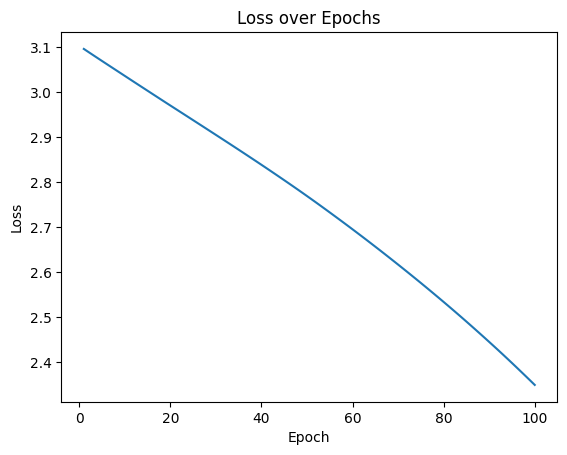

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

In [ ]:
# Use the autoencoder to encode and decode the sequence
seq_decoded = autoencoder.predict(seq_encoded)

1/1 [==============================] - 0s 97ms/step


In [ ]:
# Compute reconstruction error metrics
cross_entropy = -np.mean(np.sum(seq_encoded * np.log(seq_decoded), axis=-1))
same_aa_accuracy = np.mean(np.argmax(seq_encoded, axis=-1) == np.argmax(seq_decoded, axis=-1))
most_common_aa_accuracy = np.mean(np.argmax(seq_encoded.sum(axis=0), axis=-1) == np.argmax(seq_decoded.sum(axis=0), axis=-1))

In [ ]:
print("Cross-entropy:", cross_entropy)
print("Same amino acid accuracy:", same_aa_accuracy)
print("Most common amino acid accuracy:", most_common_aa_accuracy)

Cross-entropy: 2.3390187523963695
Same amino acid accuracy: 0.9559471365638766
Most common amino acid accuracy: 0.9559471365638766


In [ ]:
#decoding

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

amino_acids = 'ACDEFGHIKLMNPQRSTVWY-'

def one_hot_encoding(seq):
    # Define the amino acid alphabet
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY-'
    # Create a dictionary to map each amino acid to its index in the alphabet
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    # Initialize the one-hot encoded array
    one_hot = np.zeros((len(seq), len(amino_acids)))
    # Set the appropriate elements to 1
    for i, aa in enumerate(seq):
        if aa in aa_to_index:
            one_hot[i, aa_to_index[aa]] = 1
    return one_hot

def decode_sequence(one_hot_seq):
    # Define the amino acid alphabet
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY-'
    # Convert the one-hot encoded sequence back into an amino acid sequence
    return ''.join([amino_acids[i] for i in np.argmax(one_hot_seq, axis=-1)])

# Define the size of the latent space
latent_dim = 32

# Define the autoencoder architecture
input_seq = Input(shape=(None, len(amino_acids)))
encoded = Dense(latent_dim, activation='relu')(input_seq)
decoded = Dense(len(amino_acids), activation='softmax')(encoded)
autoencoder = Model(input_seq, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')


# Encode the sequence using one-hot encoding
seq_encoded = one_hot_encoding(seq).reshape(1, -1, len(amino_acids))

# Train the autoencoder on the encoded sequence
autoencoder.fit(seq_encoded, seq_encoded, epochs=100)




Epoch 1/100
1/1 [==============================] - 1s 676ms/step - loss: 2.9676
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 2.9605
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 2.9534
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 2.9463
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 2.9392
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 2.9320
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 2.9249
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 2.9178
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 2.9106
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 2.9035
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 2.8963
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 2.8892
Epoch 13/100
1/1 [==============================] 

In [ ]:
#decoding

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

amino_acids = 'ACDEFGHIKLMNPQRSTVWY-'

def one_hot_encoding(seq):
    # Define the amino acid alphabet
    
    # Create a dictionary to map each amino acid to its index in the alphabet
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    # Initialize the one-hot encoded array
    one_hot = np.zeros((len(seq), len(amino_acids)))
    # Set the appropriate elements to 1
    for i, aa in enumerate(seq):
        if aa in aa_to_index:
            one_hot[i, aa_to_index[aa]] = 1
    return one_hot

def decode_sequence(one_hot_seq):
    # Define the amino acid alphabet
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY-'
    # Convert the one-hot encoded sequence back into an amino acid sequence
    return ''.join([amino_acids[i] for i in np.argmax(one_hot_seq, axis=-1)])

# Define the size of the latent space
latent_dim = 32

# Define the autoencoder architecture
input_seq = Input(shape=(None, len(amino_acids)))
encoded = Dense(latent_dim, activation='relu')(input_seq)
decoded = Dense(len(amino_acids), activation='softmax')(encoded)
autoencoder = Model(input_seq, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

# Encode the sequence using one-hot encoding
seq_encoded = one_hot_encoding(seq).reshape(1, -1, len(amino_acids))

# Train the autoencoder on the encoded sequence
autoencoder.fit(seq_encoded, seq_encoded, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 667ms/step - loss: 3.0436
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 3.0368
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 3.0300
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 3.0232
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 3.0164
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 3.0097
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 3.0029
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 2.9962
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 2.9895
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 2.9828
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 2.9761
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 2.9694
Epoch 13/100
1/1 [==============================] - 0s

In [ ]:
# Use the autoencoder to encode and decode the sequence
seq_decoded = autoencoder.predict(seq_encoded)

1/1 [==============================] - 0s 139ms/step


In [ ]:
# Compute reconstruction error metrics
cross_entropy = -np.mean(np.sum(seq_encoded * np.log(seq_decoded), axis=-1))
#  print(np.sum(seq_encoded * np.log(seq_decoded), axis=-1)) 
same_aa_accuracy = np.mean(np.argmax(seq_encoded, axis=-1) == np.argmax(seq_decoded, axis=-1))
most_common_aa_accuracy = np.mean(np.argmax(seq_encoded.sum(axis=0), axis=-1) == np.argmax(seq_decoded.sum(axis=0), axis=-1))

print("Cross-Entropy:", cross_entropy)
print("Accuracy (Same aa):", same_aa_accuracy)
print("Accuracy (Mode aa):", most_common_aa_accuracy)


Cross-Entropy: 2.1999015109654567
Accuracy (Same aa): 0.9074889867841409
Accuracy (Mode aa): 0.9074889867841409


In [ ]:
# Decode and print the original and reconstructed sequences
print("Original sequence:")
print(decode_sequence(seq_encoded[0]))
print("Reconstructed sequence:")
print(decode_sequence(seq_decoded[0]))


Original sequence:
---------LTRFGYPQSLDDLADHALIHYASNLGVRPLGFEVVSDGAVRWVKAGGVLTVNSTETYQASCLAGLGIIQVPRIGVREMLRTGELIEILPHYRAEPLPVSLIYPHRRNLSRRVHLFMEWLGGMM----MKFVTGIVASLVGLSFG-AFAAKEIQKD---E-VANLTKIGSITTS-RTSPMDAKRDLSKKADELGGTYFVVIAGEKNEKVHANADVYK--
Reconstructed sequence:
---------LTRFGYVVSLDDLADIALIIYASNLGVRVLGFEVVSDGAVRRVKAGGVLTVNSTETYVASPLAGLGIIVVVRIGVREMLRTGELIEILVIYRAEVLVVSLIYVIRRNLSRRVILFMERLGGMM----MKFVTGIVASLVGLSFG-AFAAKEIVKD---E-VANLTKIGSITTS-RTSVMDAKRDLSKKADELGGTYFVVIAGEKNEKVIANADVYK--


In [ ]:

# Autoencoder for other amion acids 

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

# Define the amino acid alphabet
amino_acids = 'S A G N G N Y E R A G I-'

def one_hot_encoding(seq):
    # Create a dictionary to map each amino acid to its index in the alphabet
    aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}
    # Initialize the one-hot encoded array
    one_hot = np.zeros((len(seq), len(amino_acids)))
    # Set the appropriate elements to 1
    for i, aa in enumerate(seq):
        if aa in aa_to_index:
            one_hot[i, aa_to_index[aa]] = 1
    return one_hot

# Define the size of the latent space
latent_dim = 32

# Define the architecture of the autoencoder
input_seq = Input(shape=(None, len(amino_acids)))
encoded = Dense(latent_dim, activation='relu')(input_seq)
decoded = Dense(len(amino_acids), activation='softmax')(encoded)
autoencoder = Model(input_seq, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')
